In [24]:
import tensorflow.keras.datasets as datasets
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

# Cargar el conjunto de datos MNIST

dataset_mnist= keras.datasets.mnist




(train_images, train_labels),(test_images, test_labels) = dataset_mnist.load_data()




x_train=train_images[:50000].reshape(50000,-1).astype(np.float32)/255      #784
y_train=train_labels[:50000].reshape(50000,1)


x_val=train_images[50000:].reshape(10000,-1).astype(np.float32)/255   # se aplica operracion de seleccion , luego remodelado y por ultimo normalizacion 
y_val=train_labels[50000:].reshape(10000,1)

x_test=test_images.copy().reshape(10000,-1).astype(np.float32)/255
y_test=test_labels.copy().reshape(10000,1)


print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)




(50000, 784)
(50000, 1)
(10000, 784)
(10000, 1)
(10000, 784)
(10000, 1)


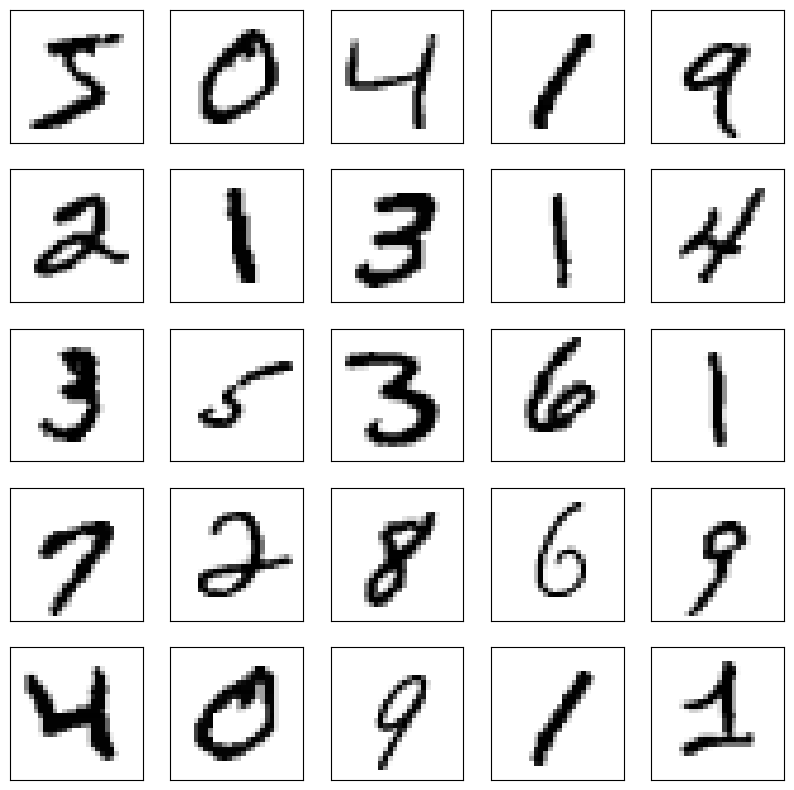

In [7]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]) #quitamos los ticks del eje x
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)#cmap=plt.cm.binary se utiliza para mostrar la imagen en blanco y negro (escala de grises).

plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score,accuracy_score,classification_report,roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [10]:
y_pred = model.predict(x_test)

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)

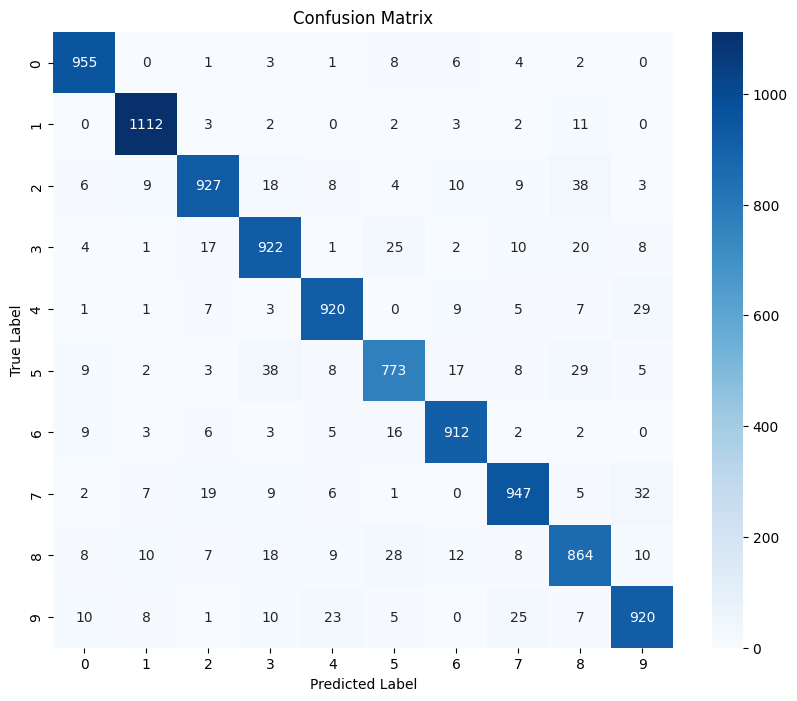

In [14]:
# Dibujar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
exactitud=accuracy_score(y_test,y_pred)
print(f'La exactitud del modelo es: {exactitud}')

La exactitud del modelo es: 0.9252


In [21]:
reporte=classification_report(y_test,y_pred)
print('\nReporte de clasifiacion:\n',reporte)


Reporte de clasifiacion:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.92      1028
           8       0.88      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



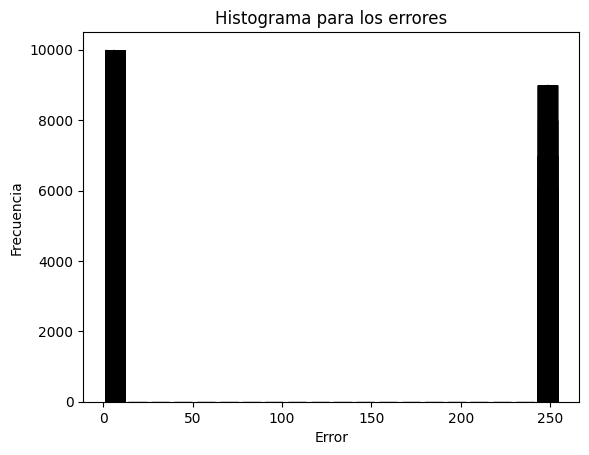

In [27]:
error=y_test-y_pred
error

plt.hist(error,bins=20,edgecolor='k')
plt.title('Histograma para los errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()